In [6]:
import pandas as pd
from urllib.request import Request, urlretrieve
from pathlib import Path  
import ssl
import os
import re
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import tensorflow as tf
from art_api import config
from google.cloud import storage, vision

def init():
    imgs = []
    df = pd.read_csv(f"gs://{config.BUCKET_NAME}/{config.BUCKET_TRAIN_DATA_FILE}")
    return imgs, df

def resize_rescale():
    imgs = []
    df = pd.read_csv(f"gs://{config.BUCKET_NAME}/{config.BUCKET_TRAIN_DATA_FILE}")
    
    for index, row in df.iterrows():
        img_file = str(row["filename"])
        image = Image.open(os.path.join(config.PATH_YOURPAINTINGS, img_file))
        image = image.resize((256, 256), Image.ANTIALIAS)
        image.save(os.path.join(config.PATH_YOURPAINTINGS_SM, img_file))
        #imgs.append(np.array(image/255))
    return imgs, df

def load_data():
    '''
    This function loads our X and y from GCP
    '''
    imgs, df = init()
    
    for index, row in df.iterrows():
        img_file = str(row["filename"])
        image = Image.open(os.path.join(config.PATH_YOURPAINTINGS, img_file))   
        imgs.append(np.array(image))
    
    X = np.array(imgs)
    X.shape
    df.columns
    y = df.drop(columns=['index', 'Image URL', 'Web page URL', 'Subset', 'Labels', 'filename',
       'labels'])
    return X, y

ImportError: cannot import name 'vision' from 'google.cloud' (unknown location)

In [2]:
df = pd.read_csv(f"gs://{config.BUCKET_NAME}/{config.BUCKET_TRAIN_DATA_FILE}")

In [3]:
df

,index,Image URL,Web page URL,Subset,Labels,filename,labels,aeroplane,bird,boat,chair,cow,diningtable,dog,horse,sheep,train
0,0,https://d3d00swyhr67nd.cloudfront.net/w1200h12...,https://artuk.org/discover/artworks/and-the-co...,'test',' cow',NID_QUB_QUB_264-001.jpg,['cow'],0,0,0,0,1,0,0,0,0,0
1,1,https://d3d00swyhr67nd.cloudfront.net/w1200h12...,https://artuk.org/discover/artworks/0-6-00-6-0...,'train',' train',GMIII_MOSI_A1978_72_3-001.jpg,['train'],0,0,0,0,0,0,0,0,0,1
2,2,https://d3d00swyhr67nd.cloudfront.net/w1200h12...,https://artuk.org/discover/artworks/044t-locom...,'train',' train',NY_NRM_1979_7964-001.jpg,['train'],0,0,0,0,0,0,0,0,0,1
3,3,https://d3d00swyhr67nd.cloudfront.net/w1200h12...,https://artuk.org/discover/artworks/080-locomo...,'test',' train',CHE_CRHC_PCF40-001.jpg,['train'],0,0,0,0,0,0,0,0,0,1
4,4,https://d3d00swyhr67nd.cloudfront.net/w1200h12...,https://artuk.org/discover/artworks/17th-and-2...,'test',' horse',NOT_NTMAG_1997_31-001.jpg,['horse'],0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8291,8623,https://d3d00swyhr67nd.cloudfront.net/w944h944...,https://artuk.org/discover/artworks/youth-82434,'test',' diningtable',LLR_AWC_0047-001.jpg,['diningtable'],0,0,0,0,0,1,0,0,0,0
8292,8625,https://d3d00swyhr67nd.cloudfront.net/w1200h12...,https://artuk.org/discover/artworks/yport-20094,'test',' boat',STF_STKMG_1965_FA_10-001.jpg,['boat'],0,0,1,0,0,0,0,0,0,0
8293,8626,https://d3d00swyhr67nd.cloudfront.net/w1200h12...,https://artuk.org/discover/artworks/yport-norm...,'train',' bird',NY_YAG_YORAG_1030-001.jpg,['bird'],0,1,0,0,0,0,0,0,0,0
8294,8627,https://d3d00swyhr67nd.cloudfront.net/w944h944...,https://artuk.org/discover/artworks/zebra-and-...,'train',' bird',GL_GM_A_1989_23_e-001.jpg,['bird'],0,1,0,0,0,0,0,0,0,0


In [12]:
from io import BytesIO
client = storage.Client() # Implicit environment set up
# with explicit set up:
# client = storage.Client.from_service_account_json('key-file-location')

bucket = client.get_bucket(config.BUCKET_NAME)

blob_uri = f"gs://{config.BUCKET_NAME}/{config.BUCKET_TRAIN_DATA_PATH}/NID_QUB_QUB_264-001.jpg"
print(blob_uri)
#blob_source = vision.Image(source=vision.ImageSource(image_uri=blob_uri))
#blob = bucket.get_blob(blob_uri)
#print(blob)
#Image(blob.download_as_bytes())
#img = Image.open(BytesIO(blob_uri.download_as_bytes()))

gs://art-api/data/raw_data/yourpaintings_sm/NID_QUB_QUB_264-001.jpg


In [16]:
client = storage.Client()
bucket = client.get_bucket(config.BUCKET_NAME)
blob = storage.Blob(config.BUCKET_TRAIN_DATA_PATH, bucket)
with open('file-to-download-to', 'w') as file_obj:
    client.download_blob_to_file(blob, file_obj)

NotFound: 404 GET https://storage.googleapis.com/download/storage/v1/b/art-api/o/data%2Fraw_data%2Fyourpaintings_sm?alt=media: No such object: art-api/data/raw_data/yourpaintings_sm: ('Request failed with status code', 404, 'Expected one of', <HTTPStatus.OK: 200>, <HTTPStatus.PARTIAL_CONTENT: 206>)

data/raw_data/yourpaintings_sm/NID_QUB_QUB_264-001.jpg
<Blob: art-api, data/raw_data/yourpaintings_sm/NID_QUB_QUB_264-001.jpg, 1662730399385007>


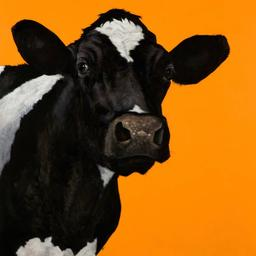

In [34]:
from pathlib import Path  

from IPython.display import Image

client = storage.Client()
bucket = client.bucket(config.BUCKET_NAME)
#path = Path(config.BUCKET_TRAIN_DATA_PATH/"NID_QUB_QUB_264-001.jpg")
path = f"{config.BUCKET_TRAIN_DATA_PATH}/NID_QUB_QUB_264-001.jpg"
print(path)
blob = bucket.get_blob(path)
print(blob)
# download to memory
Image(blob.download_as_bytes())

#blob = bucket.get_blob('images/test.png')
#Image(blob.download_as_bytes())

In [22]:
from io import BytesIO
from PIL import Image

img = Image.open(BytesIO(blob.download_as_bytes()))

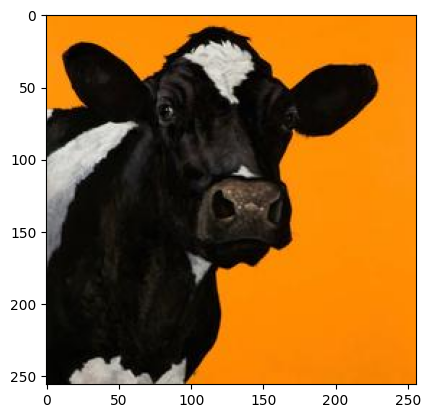

In [24]:
plt.imshow(img)